## ***`SCENARIO Given By Nitin`***

In [1]:
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
mapping = [('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'e'), ('f', 'e'), ('g', 'h')]
key = [pair[0] for pair in mapping]
values = [pair[1] for pair in mapping]

In [3]:
key, values

(['a', 'a', 'a', 'b', 'f', 'g'], ['b', 'c', 'd', 'e', 'e', 'h'])

In [4]:
keys_counter = Counter(key)
keys_counter

Counter({'a': 3, 'b': 1, 'f': 1, 'g': 1})

In [5]:
d_keys = []
d_values = []
for idx,val in enumerate(key):
    if val not in d_keys:
        d_keys.append(val)
        start_idx = key.index(val)
        end_idx = keys_counter.get(key[idx])
        d_values.append(values[start_idx:start_idx+end_idx])

In [6]:
d_keys, d_values

(['a', 'b', 'f', 'g'], [['b', 'c', 'd'], ['e'], ['e'], ['h']])

In [7]:
mapping_dict = dict(list(zip(d_keys,d_values)))
mapping_dict

{'a': ['b', 'c', 'd'], 'b': ['e'], 'f': ['e'], 'g': ['h']}

In [8]:
for key,val in mapping_dict.items():
    for item in list(val):
        new_val = mapping_dict.get(item,-1)
        if new_val != -1:
            mapping_dict[key].append(new_val[0])

In [9]:
mapping_dict

{'a': ['b', 'c', 'd', 'e'], 'b': ['e'], 'f': ['e'], 'g': ['h']}

In [10]:
v1 = []
v2 = []
for k,v in mapping_dict.items():
    if len(v) > 1:
        for val in v:
            print(k,val)
            v1.append(k)
            v2.append(val)
    else:
        print(k,v[0])
        v1.append(k)
        v2.append(v[0])

a b
a c
a d
a e
b e
f e
g h


In [11]:
v1,v2

(['a', 'a', 'a', 'a', 'b', 'f', 'g'], ['b', 'c', 'd', 'e', 'e', 'e', 'h'])

In [12]:
for k,v in mapping_dict.items():
    if len(v) > 1:
        for val in v:
            for vv in mapping_dict.get(k):
                if vv != val:
                    print(vv,val)
                    v1.append(vv)
                    v2.append(val)
            print(val,k)
            v1.append(val)
            v2.append(k)
    else:
        print(v[0],k)
        v1.append(v[0])
        v2.append(k)

c b
d b
e b
b a
b c
d c
e c
c a
b d
c d
e d
d a
b e
c e
d e
e a
e b
e f
h g


In [13]:
print(v1,v2)

['a', 'a', 'a', 'a', 'b', 'f', 'g', 'c', 'd', 'e', 'b', 'b', 'd', 'e', 'c', 'b', 'c', 'e', 'd', 'b', 'c', 'd', 'e', 'e', 'e', 'h'] ['b', 'c', 'd', 'e', 'e', 'e', 'h', 'b', 'b', 'b', 'a', 'c', 'c', 'c', 'a', 'd', 'd', 'd', 'a', 'e', 'e', 'e', 'a', 'b', 'f', 'g']


In [14]:
df = pd.DataFrame({'c1':v1,'c2':v2})
df

,c1,c2
0,a,b
1,a,c
2,a,d
3,a,e
4,b,e
5,f,e
6,g,h
7,c,b
8,d,b
9,e,b


In [19]:
inp1 = ['g','a','h','c']
inp2 = ['b','f','g','h']

In [20]:
for i in range(len(inp1)):
    if inp1[i] not in list(df['c1']) or inp2[i] not in list(df['c1']):
        print("False")
    else:
        results1 = set(df[df['c1']==inp1[i]]['c2'].values).union(set(df[df['c2']==inp1[i]]['c1'].values))
        results2 = set(df[df['c1']==inp2[i]]['c2'].values).union(set(df[df['c2']==inp2[i]]['c1'].values))
        final_result = list(results1.intersection(results2))
        if len(final_result) >= 1 or len(list((results1.union(results2)).intersection(set((inp1[i],inp2[i]))))) > 1:
              print("True")
        else:
              print("False")

False
True
True
False


## ***Hence Solved!!!!!!***

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
aa = tuple([[1,2,3,4]])
type(aa), aa

(tuple, ([1, 2, 3, 4],))

In [8]:
set([[1,2],3,4])

TypeError: unhashable type: 'list'

In [50]:
dictionary = ['heater', 'cold', 'clod', 'reheat', 'docl']
query = ['codl', 'heater', 'abcd']

In [110]:
combined = [''.join(sorted(word)) for word in dictionary]
res = Counter(combined)
final_matches = []
for i in range(len(query)):
    final_matches.append(res.get(''.join(sorted(query[i]))))

In [111]:
final_matches

[3, 2, None]

In [ ]:
query.remove()

In [96]:
from collections import Counter

In [101]:
[Counter(ll) for ll in combined]

[Counter({'a': 1, 'e': 2, 'h': 1, 'r': 1, 't': 1}),
 Counter({'c': 1, 'd': 1, 'l': 1, 'o': 1}),
 Counter({'c': 1, 'd': 1, 'l': 1, 'o': 1}),
 Counter({'a': 1, 'e': 2, 'h': 1, 'r': 1, 't': 1}),
 Counter({'c': 1, 'd': 1, 'l': 1, 'o': 1}),
 Counter({'c': 1, 'd': 1, 'l': 1, 'o': 1}),
 Counter({'a': 1, 'e': 2, 'h': 1, 'r': 1, 't': 1}),
 Counter({'a': 1, 'b': 1, 'c': 1, 'd': 1})]

In [113]:
combined = [''.join(sorted(word)) for word in comb]
res = Counter(combined)
res.get('aa',0)

0

In [81]:
set(query)

{'abcd', 'codl', 'heater'}

In [56]:
new_dict = [sorted(word) for word in dictionary]
new_query = [sorted(word) for word in query]

In [57]:
new_dict,new_query

([['a', 'e', 'e', 'h', 'r', 't'],
  ['c', 'd', 'l', 'o'],
  ['c', 'd', 'l', 'o'],
  ['a', 'e', 'e', 'h', 'r', 't'],
  ['c', 'd', 'l', 'o']],
 [['c', 'd', 'l', 'o'], ['a', 'e', 'e', 'h', 'r', 't'], ['a', 'b', 'c', 'd']])

In [94]:
final_matches = []
for i in range(len(query)):
    final_matches.append(combined.count(sorted(query[i]))-1)  

In [95]:
final_matches

[3, 2, 0]

In [67]:
for word in new_query:
    print(word)

['c', 'd', 'l', 'o']
['a', 'e', 'e', 'h', 'r', 't']
['a', 'b', 'c', 'd']


In [82]:
final_matches = []
for word in query:
    s_word = sorted(word)
    c = new_dict.count(s_word)
    final_matches.append(c)

In [83]:
final_matches

[3, 2, 0]

In [70]:
final_matches = []
for word in new_query:
    matches = []
    for dict_word in new_dict:
        if dict_word == word:
            matches.append(1)
    final_matches.append(len(matches))

In [71]:
final_matches

[3, 2, 0]

In [36]:
# Enter your code here. Read input from STDIN. Print output to STDOUT

import math
from functools import reduce

def calc_cc(x,y):
    summation = lambda a,b : a+b
    sum_x = reduce(summation, x)
    sum_y = reduce(summation, y)
    mean_x, mean_y = float(sum_x/len(x)), float(sum_y/len(y))

    x_deviation = []
    y_deviation = []
    for i in range(len(x)):
        diff_x = x[i] - mean_x
        x_deviation.append(diff_x)
        
        diff_y = y[i] - mean_y
        y_deviation.append(diff_y)

    numerator, denom1, denom2 = 0,0,0
    for i in range(len(x)):
        numerator += x_deviation[i] * y_deviation[i]
        denom1 += x_deviation[i]**2
        denom2 += y_deviation[i]**2
        
    corr_coeff = round(numerator/(math.sqrt(denom1*denom2)),2)
    return corr_coeff
    
if __name__ == '__main__':
    n = int(input())
    m = [0]*n
    p = [0]*n
    c = [0]*n
    count = 0
    for _ in range(n):
        m[count], p[count], c[count] = map(int, tuple(input().split()))
        count += 1
    cc_m_p = calc_cc(m,p)
    cc_p_c = calc_cc(p,c)
    cc_c_m = calc_cc(c,m)
    print(cc_m_p)
    print(cc_p_c)
    print(cc_c_m)

 2
 12300 1433 3456
 890 87654 567


-1.0
-1.0
1.0


In [29]:
# Enter your code here. Read input from STDIN. Print output to STDOUT
import math
from functools import reduce

x = [15 , 12 , 8  , 8 ,  7 ,  7 ,  7 ,  6   , 5  , 3]
y = [10  ,25 , 17  ,11 , 13 , 17 , 20 , 13 , 9  , 15]

#calculate mean of x and y
summation = lambda x,y : x+y
sum_x = reduce(summation, x)
sum_y = reduce(summation, y)
mean_x, mean_y = float(sum_x/len(x)), float(sum_y/len(y))

x_deviation = []
y_deviation = []
for i in range(len(x)):
    diff_x = x[i] - mean_x
    x_deviation.append(diff_x)
    
    diff_y = y[i] - mean_y
    y_deviation.append(diff_y)

numerator, denom1, denom2 = 0,0,0
for i in range(len(x)):
    numerator += x_deviation[i] * y_deviation[i]
    denom1 += x_deviation[i]**2
    denom2 += y_deviation[i]**2

corr_coeff = numerator/(math.sqrt(denom1*denom2))
slope = (corr_coeff) * (math.sqrt(denom2)/math.sqrt(denom1))
intercept = mean_y - (slope * mean_x)
print(round(intercept + (slope * 10),1))

15.5


In [28]:
# Enter your code here. Read input from STDIN. Print output to STDOUT
import math
from functools import reduce

x = [15 , 12 , 8  , 8 ,  7 ,  7 ,  7 ,  6   , 5  , 3]
y = [10  ,25 , 17  ,11 , 13 , 17 , 20 , 13 , 9  , 15]

#calculate mean of x and y
summation = lambda x,y : x+y
sum_x = reduce(summation, x)
sum_y = reduce(summation, y)
mean_x, mean_y = float(sum_x/len(x)), float(sum_y/len(y))

x_deviation = []
y_deviation = []
for i in range(len(x)):
    diff_x = x[i] - mean_x
    x_deviation.append(diff_x)
    
    diff_y = y[i] - mean_y
    y_deviation.append(diff_y)

numerator, denom1, denom2 = 0,0,0
for i in range(len(x)):
    numerator += x_deviation[i] * y_deviation[i]
    denom1 += x_deviation[i]**2
    denom2 += y_deviation[i]**2

corr_coeff = numerator/(math.sqrt(denom1*denom2))
slope = (corr_coeff) * (math.sqrt(denom2)/math.sqrt(denom1))
print(round(slope,3))

0.208


In [26]:
# Enter your code here. Read input from STDIN. Print output to STDOUT
import math
from functools import reduce
x = [15 , 12 , 8  , 8 ,  7 ,  7 ,  7 ,  6   , 5  , 3]
y = [10  ,25 , 17  ,11 , 13 , 17 , 20 , 13 , 9  , 15]
#calculate mean of x and y
summation = lambda x,y : x+y
sum_x = reduce(summation, x)
sum_y = reduce(summation, y)
mean_x, mean_y = float(sum_x/len(x)), float(sum_y/len(y))

x_deviation = []
y_deviation = []
for i in range(len(x)):
    diff_x = x[i] - mean_x
    x_deviation.append(diff_x)
    
    diff_y = y[i] - mean_y
    y_deviation.append(diff_y)

numerator, denom1, denom2 = 0,0,0
for i in range(len(x)):
    numerator += x_deviation[i] * y_deviation[i]
    denom1 += x_deviation[i]**2
    denom2 += y_deviation[i]**2

corr_coeff = numerator/(math.sqrt(denom1*denom2))
print(round(corr_coeff,3))

0.145


In [25]:
np.corrcoef(x,y)

array([[1.        , 0.14499815],
       [0.14499815, 1.        ]])

In [24]:
txt = "Hello HoW are you?"

txt.swapcase()

'hELLO hOw ARE YOU?'

In [2]:
def fun(x):
    x[0] = 5
    return x

In [4]:
g = [10,11,12]
print(fun(g), g)

[5, 11, 12] [5, 11, 12]


In [21]:
import csv

In [25]:
df = pd.DataFrame({'Id':[1,2,3,4],'val':[2,5,np.nan,6]})

In [35]:
df['val'][3] == np.nan

False

In [74]:
np_arr1 = np.array([1,2,3,4])

In [83]:
np_arr1.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [76]:
np2=np_arr1

In [77]:
np2.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [81]:
id(np_arr1) == id(np2)

True

In [80]:
np_arr1[1]=10

In [82]:
np_arr1.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

array([[<AxesSubplot:xlabel='Id', ylabel='Id'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='Id'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='Id'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='Id'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='Id'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='Id'>,
        <AxesSubplot:xlabel='FullBath', ylabel='Id'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='Id'>,
        <AxesSubplot:xlabel='YearRemodAdd', ylabel='Id'>,
        <AxesSubplot:xlabel='LotFrontage', ylabel='Id'>,
        <AxesSubplot:xlabel='MSSubClass', ylabel='Id'>,
        <AxesSubplot:xlabel='SalePrice', ylabel='Id'>],
       [<AxesSubplot:xlabel='Id', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='OverallQual'>,
        <AxesSubpl

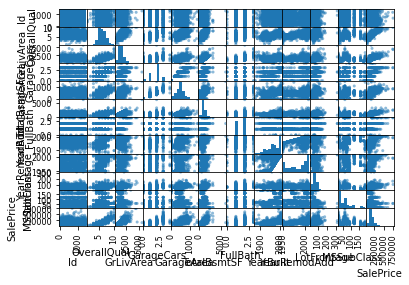

In [49]:
pd.plotting.scatter_matrix(dtf)

In [71]:
dtf['GarageCars'].values.reshape([-1,1])

array([[2],
       [2],
       [2],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [73]:
pd.crosstab(dtf['GarageCars'],dtf['FullBath'])

FullBath,0,1,2,3
GarageCars,,,,
0,1,56,22,2
1,2,318,48,1
2,4,262,546,12
3,2,11,150,18
4,0,3,2,0


In [45]:
df.val.isna()

0    False
1    False
2     True
3    False
Name: val, dtype: bool

In [24]:
houses_data = pd.read_csv("data_houses.txt",sep='\t')
houses_data.shape

(1460, 81)

In [ ]:
houses_data.rename()

In [8]:
houses_data.set_index('OverallQual')['GarageCars'].to_dict()

{7: 1, 6: 2, 8: 3, 5: 1, 9: 3, 4: 1, 10: 3, 3: 3, 1: 0, 2: 1}

In [7]:
cols = ["OverallQual","GrLivArea","GarageCars", 
        "GarageArea","TotalBsmtSF","FullBath",
        "YearBuilt","YearRemodAdd",
        "LotFrontage","MSSubClass"]
dtf = houses_data[["Id"]+cols+["SalePrice"]].copy(deep=True)
dtf.head()

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,LotFrontage,MSSubClass,SalePrice
0,1,7,1710,2,548,856,2,2003,2003,65.0,60,208500
1,2,6,1262,2,460,1262,2,1976,1976,80.0,20,181500
2,3,7,1786,2,608,920,2,2001,2002,68.0,60,223500
3,4,7,1717,3,642,756,1,1915,1970,60.0,70,140000
4,5,8,2198,3,836,1145,2,2000,2000,84.0,60,250000


In [11]:
grped_results = dtf.groupby(['GarageCars','FullBath']).GarageArea.sum()
grped_results

GarageCars  FullBath
0           0                0
            1                0
            2                0
            3                0
1           0              672
            1            95115
            2            14874
            3              230
2           0             2090
            1           136585
            2           282528
            3             7110
3           0             1542
            1             9751
            2           120812
            3            14790
4           1             2700
            2             1752
Name: GarageArea, dtype: int64

<AxesSubplot:xlabel='GarageCars'>

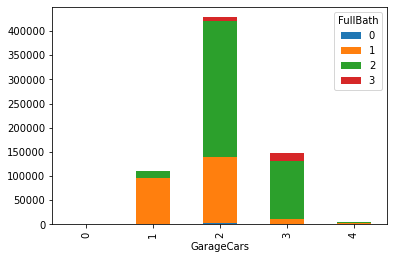

In [14]:
grped_results.unstack().plot(kind='bar',stacked=True)

In [16]:
set1={1,2,3,4}
set2={2,3,4,5}
set1-set2,set2-set1

({1}, {5})

In [29]:
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

In [33]:
dic_cols = {col:utils_recognize_type(dtf, col, max_cat=20) for col in dtf.columns}

In [64]:
heatmap = dtf.isnull()

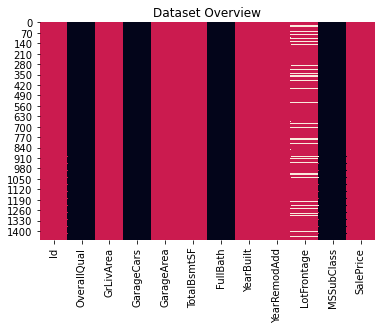

 Categerocial   Numeric   NaN 


In [65]:
for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)

sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
# print("\033[1;30;43m Hello")
print("\033[1;30;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")